In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# KNN
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

# NN
from sklearn.neural_network import MLPClassifier

# ROC
from sklearn.metrics import roc_curve

## IMPORT DATASET

In [49]:
# METER A
meter_a_cols = [
    'Flatness Ratio', 'Symmetry', 'Crossflow', 
    
    'Flow Velocity #1', 'Flow Velocity #2', 'Flow Velocity #3', 'Flow Velocity #4', 
    'Flow Velocity #5', 'Flow Velocity #6', 'Flow Velocity #7', 'Flow Velocity #8', 

    'Speed of Sound #1', 'Speed of Sound #2', 'Speed of Sound #3', 'Speed of Sound #4', 
    'Speed of Sound #5', 'Speed of Sound #6', 'Speed of Sound #7', 'Speed of Sound #8', 
    'Average Speed of Sound', 

    'Gain #1.1', 'Gain #1.2', 'Gain #2.1', 'Gain #2.2', 
    'Gain #3.1', 'Gain #3.2', 'Gain #4.1', 'Gain #4.2', 
    'Gain #5.1', 'Gain #5.2', 'Gain #6.1', 'Gain #6.2', 
    'Gain #7.1', 'Gain #7.2', 'Gain #8.1', 'Gain #8.2', 

    'Health State'
]
meter_a = pd.read_table('Meter A', names=meter_a_cols)
pd.set_option('display.max_columns', None)
meter_a

Flatness Ratio  Symmetry  Crossflow  Flow Velocity #1  Flow Velocity #2  \
0         0.841499  1.009367   0.993816          8.469805         10.278727   
1         0.842250  1.006584   0.996605          7.531891          9.139924   
2         0.840723  1.011647   0.998152          6.641699          7.975464   
3         0.841119  1.017807   0.996812          5.687524          6.824334   
4         0.840358  1.016534   0.996221          5.660385          6.829560   
..             ...       ...        ...               ...               ...   
82        0.792929  1.006295   0.999666          2.696691          3.414048   
83        0.792309  1.004472   0.999873          2.679006          3.433638   
84        0.793471  1.009560   1.001110          2.691553          3.431745   
85        0.796730  1.010570   0.999029          2.714849          3.412818   
86        0.790194  1.004195   0.995537          1.781262          2.247824   

    Flow Velocity #3  Flow Velocity #4  Flow Velocity #5  Flow Velocity #6  \
0          10.037759          8.501365          8.581726         10.247763   
1           8.951618          7.612213          7.623325          9.106345   
2           7.857692          6.593117          6.681572          7.964596   
3           6.689885          5.615428          5.763315          6.801051   
4           6.675628          5.623977          5.736818          6.813453   
..               ...               ...               ...               ...   
82          3.389731          2.699618          2.715628          3.414042   
83          3.386612          2.714345          2.699840          3.429142   
84          3.364790          2.717383          2.700560          3.432876   
85          3.388927          2.692776          2.738119          3.413739   
86          2.234980          1.785612          1.767456          2.261254   

    Flow Velocity #7  Flow Velocity #8  Speed of Sound #1  Speed of Sound #2  \
0          10.058822          8.631366        1485.528500        1485.454000   
1           8.945142          7.674046        1486.042333        1485.992833   
2           7.814698          6.660930        1486.023667        1485.980833   
3           6.686639          5.645545        1484.898000        1484.872000   
4           6.672377          5.660944        1484.361333        1484.331833   
..               ...               ...                ...                ...   
82          3.393569          2.680925        1484.752667        1484.728333   
83          3.380373          2.705791        1484.689000        1484.664500   
84          3.374046          2.684454        1484.638167        1484.612667   
85          3.381779          2.687601        1484.580167        1484.555833   
86          2.239285          1.764256        1484.490833        1484.471167   

    Speed of Sound #3  Speed of Sound #4  Speed of Sound #5  \
0         1485.437500        1485.354167        1485.468167   
1         1485.973333        1485.867833        1485.990333   
2         1485.960000        1485.850500        1485.963667   
3         1484.852333        1484.739000        1484.849333   
4         1484.313833        1484.205000        1484.307500   
..                ...                ...                ...   
82        1484.707833        1484.593000        1484.696500   
83        1484.644667        1484.529333        1484.633167   
84        1484.594167        1484.478333        1484.581667   
85        1484.537000        1484.422667        1484.524333   
86        1484.452167        1484.334667        1484.435000   

    Speed of Sound #6  Speed of Sound #7  Speed of Sound #8  \
0         1485.450667        1484.928167        1485.508667   
1         1485.992167        1485.466667        1486.033667   
2         1485.979500        1485.454667        1486.012333   
3         1484.872000        1484.344500        1484.900333   
4         1484.331833        1483.807667        1484.364000   
..                ... 

In [50]:
# METER B
meter_b_cols = [
    'Profile Factor', 'Symmetry', 'Crossflow', 'Swirl Angle',

    'Flow Velocity #1', 'Flow Velocity #2', 'Flow Velocity #3', 'Flow Velocity #4', 
    'Average Flow Velocity', 

    'Speed of Sound #1', 'Speed of Sound #2', 'Speed of Sound #3', 'Speed of Sound #4',  
    'Average Speed of Sound', 

    'Signal Strength #1.1', 'Signal Strength #1.2', 'Signal Strength #2.1', 'Signal Strength #2.2',
    'Signal Strength #3.1', 'Signal Strength #3.2', 'Signal Strength #4.1', 'Signal Strength #4.2',

    'Turbulence #1', 'Turbulence #2', 'Turbulence #3', 'Turbulence #4',

    'Meter Performance',

    'Signal Quality #1.1', 'Signal Quality #1.2', 'Signal Quality #2.1', 'Signal Quality #2.2',
    'Signal Quality #3.1', 'Signal Quality #3.2', 'Signal Quality #4.1', 'Signal Quality #4.2',

    'Gain #1.1', 'Gain #1.2', 'Gain #2.1', 'Gain #2.2', 
    'Gain #3.1', 'Gain #3.2', 'Gain #4.1', 'Gain #4.2', 

    'Transit #1.1', 'Transit #1.2', 'Transit #2.1', 'Transit #2.2',
    'Transit #3.1', 'Transit #3.2', 'Transit #4.1', 'Transit #4.2',

    'Health State'
]
meter_b = pd.read_table('Meter B', names=meter_b_cols)
pd.set_option('display.max_columns', None)
meter_b

Profile Factor  Symmetry  Crossflow  Swirl Angle  Flow Velocity #1  \
0         1.185089  1.028128   1.016478       0.1500          2.195744   
1         1.191806  1.033750   1.019411       0.2170          2.192467   
2         1.181983  1.028089   1.020994       0.0889          3.246672   
3         1.182761  1.028783   1.021072       0.1170          3.244489   
4         1.182272  1.028922   1.021350       0.0222          3.245944   
..             ...       ...        ...          ...               ...   
87        2.418111  0.000000   0.000000       0.0000          5.332300   
88        3.290425  0.000000   0.000000       0.0000          5.420572   
89        2.601044  0.000000   0.000000       0.0000          5.256956   
90        2.336800  0.000000   0.000000       0.0000          5.222706   
91       -0.909168  0.000000   0.000000       0.0000          4.341200   

    Flow Velocity #2  Flow Velocity #3  Flow Velocity #4  \
0           2.540944          2.511961          2.087889   
1           2.546594          2.516744          2.075706   
2           3.738378          3.715217          3.079356   
3           3.741861          3.718839          3.080400   
4           3.742217          3.715456          3.080950   
..               ...               ...               ...   
87          6.662456          6.288444          0.000000   
88          6.653589          6.309761          0.000000   
89          6.672083          6.287644          0.000000   
90          6.669056          6.288772          0.000000   
91          7.222394          6.796672          0.000000   

    Average Flow Velocity  Speed of Sound #1  Speed of Sound #2  \
0                2.394439        1483.869833        1486.382167   
1                2.396089        1483.747389        1486.259222   
2                3.523517        1483.777056        1486.288222   
3                3.525933        1483.847444        1486.357167   
4                3.525128        1483.819056        1486.328444   
..                    ...                ...                ...   
87               5.922272        1550.598167        1514.837722   
88               5.924100        1542.063444        1514.835889   
89               5.916767        1550.688444        1514.864944   
90               5.895378        1550.800889        1514.913278   
91               5.971333        1542.708278        1515.027222   

    Speed of Sound #3  Speed of Sound #4  Average Speed of Sound  \
0         1485.372056        1484.989000             1485.153222   
1         1485.250333        1484.867056             1485.030722   
2         1485.281000        1484.898889             1485.061111   
3         1485.350444        1484.970167             1485.131278   
4         1485.320500        1484.944333             1485.103278   
..                ...                ...                     ...   
87        1516.918111           0.000000             1527.452111   
88        1516.951389           0.000000             1527.424278   
89        1516.983444           0.000000             1527.512111   
90        1517.048222           0.000000             1527.587444   
91        1517.163722           0.000000             1527.773500   

    Signal Strength #1.1  Signal Strength #1.2  Signal Strength #2.1  \
0            5260.655556           5067.588889           4977.822222   
1            5256.227778           5065.400000           4978.022222   
2            5278.550000           5002.900000           4971.044444   
3            5276.144444           4994.794444           4973.305556   
4            5272.716667           4993.561111           4969.877778   
..                   ...                   ...                   ...   
87            126.551166            188.576672           1547.186278   
88            123.475461            197.298350           1605.865611   
89            128.643101            195.321450           1622.813889   
90            130.656267            192.998272      

In [51]:
# METER C
meter_c_cols = [
    'Profile Factor', 'Symmetry', 'Crossflow',

    'Flow Velocity #1', 'Flow Velocity #2', 'Flow Velocity #3', 'Flow Velocity #4', 

    'Speed of Sound #1', 'Speed of Sound #2', 'Speed of Sound #3', 'Speed of Sound #4',  

    'Signal Strength #1.1', 'Signal Strength #1.2', 'Signal Strength #2.1', 'Signal Strength #2.2',
    'Signal Strength #3.1', 'Signal Strength #3.2', 'Signal Strength #4.1', 'Signal Strength #4.2',

    'Signal Quality #1.1', 'Signal Quality #1.2', 'Signal Quality #2.1', 'Signal Quality #2.2',
    'Signal Quality #3.1', 'Signal Quality #3.2', 'Signal Quality #4.1', 'Signal Quality #4.2',

    'Gain #1.1', 'Gain #1.2', 'Gain #2.1', 'Gain #2.2', 
    'Gain #3.1', 'Gain #3.2', 'Gain #4.1', 'Gain #4.2', 

    'Transit #1.1', 'Transit #1.2', 'Transit #2.1', 'Transit #2.2',
    'Transit #3.1', 'Transit #3.2', 'Transit #4.1', 'Transit #4.2',

    'Health State'
]
meter_c = pd.read_table('Meter C', names=meter_c_cols)
pd.set_option('display.max_columns', None)
meter_c

Profile Factor  Symmetry  Crossflow  Flow Velocity #1  Flow Velocity #2  \
0          1.102690  1.004425   1.006741         15.228611         16.676389   
1          1.101432  1.003722   1.008256         14.106667         15.407500   
2          1.098568  1.002528   1.009103         14.136667         15.388056   
3          1.099516  1.007024   1.009363         14.146389         15.405000   
4          1.100336  1.000661   1.006709         14.056944         15.363611   
..              ...       ...        ...               ...               ...   
176        0.000000  0.000000   0.000000          0.000000          0.000000   
177        0.000000  0.000000   0.000000          0.000000          0.000000   
178        0.000000  0.000000   0.000000          0.000000          0.000000   
179        0.000000  0.000000   0.000000          0.000000          0.000000   
180        0.000000  0.000000   0.000000          0.000000          0.000000   

     Flow Velocity #3  Flow Velocity #4  Speed of Sound #1  Speed of Sound #2  \
0           16.713056         15.051389        1485.447222        1485.416667   
1           15.473889         13.930833        1485.222222        1485.211111   
2           15.484444         13.965833        1485.061111        1485.047222   
3           15.439167         13.906111        1485.144444        1485.113889   
4           15.452222         13.948889        1485.202778        1485.180556   
..                ...               ...                ...                ...   
176          0.000000         14.426944        2675.100000           0.000000   
177          0.000000         14.500278        2675.100000           0.000000   
178          0.000000         14.382778        2675.100000           0.000000   
179          0.000000         15.790556        2675.100000           0.000000   
180          0.000000         16.768056        2675.100000           0.000000   

     Speed of Sound #3  Speed of Sound #4  Signal Strength #1.1  \
0          1485.491667        1485.550000             62.000000   
1          1485.288889        1485.352778             62.000000   
2          1485.133333        1485.183333             62.000000   
3          1485.216667        1485.250000             62.000000   
4          1485.272222        1485.300000             62.000000   
..                 ...                ...                   ...   
176        1353.600000        1484.400000             58.277778   
177        1353.600000        1484.444444             60.166667   
178        1353.600000        1484.494444             59.388889   
179        1353.600000        1484.672222             59.305556   
180        1353.600000        1508.325000             61.472222   

     Signal Strength #1.2  Signal Strength #2.1  Signal Strength #2.2  \
0               62.000000             63.000000             63.000000   
1               62.000000             63.000000             63.000000   
2               62.000000             63.000000             63.000000   
3               62.000000             63.000000             63.000000   
4               62.000000             63.000000             63.000000   
..                    ...                   ...                   ...   
176             60.111111             63.166667             64.138889   
177             61.055556             54.527778             54.472222   
178             60.333333             59.444444             58.500000   
179             58.416667             57.250000             58.083333   
180             61.527778             59.611111             59.694444   

     Signal Strength #3.1  Signal Strength #3.2  Signal Strength #4.1  \
0               61.000000             61.000000             61.000000   
1               61.000000             61.000000             61.000000   
2               61.000000             61.000000             61.000000   
3               61.000000             61.000000             61.000000   
4               61.00000

In [52]:
# Check for nulls/NAs
meter_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Flatness Ratio          87 non-null     float64
 1   Symmetry                87 non-null     float64
 2   Crossflow               87 non-null     float64
 3   Flow Velocity #1        87 non-null     float64
 4   Flow Velocity #2        87 non-null     float64
 5   Flow Velocity #3        87 non-null     float64
 6   Flow Velocity #4        87 non-null     float64
 7   Flow Velocity #5        87 non-null     float64
 8   Flow Velocity #6        87 non-null     float64
 9   Flow Velocity #7        87 non-null     float64
 10  Flow Velocity #8        87 non-null     float64
 11  Speed of Sound #1       87 non-null     float64
 12  Speed of Sound #2       87 non-null     float64
 13  Speed of Sound #3       87 non-null     float64
 14  Speed of Sound #4       87 non-null     floa

In [53]:
meter_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Profile Factor          92 non-null     float64
 1   Symmetry                92 non-null     float64
 2   Crossflow               92 non-null     float64
 3   Swirl Angle             92 non-null     float64
 4   Flow Velocity #1        92 non-null     float64
 5   Flow Velocity #2        92 non-null     float64
 6   Flow Velocity #3        92 non-null     float64
 7   Flow Velocity #4        92 non-null     float64
 8   Average Flow Velocity   92 non-null     float64
 9   Speed of Sound #1       92 non-null     float64
 10  Speed of Sound #2       92 non-null     float64
 11  Speed of Sound #3       92 non-null     float64
 12  Speed of Sound #4       92 non-null     float64
 13  Average Speed of Sound  92 non-null     float64
 14  Signal Strength #1.1    92 non-null     floa

In [54]:
meter_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Profile Factor        181 non-null    float64
 1   Symmetry              181 non-null    float64
 2   Crossflow             181 non-null    float64
 3   Flow Velocity #1      181 non-null    float64
 4   Flow Velocity #2      181 non-null    float64
 5   Flow Velocity #3      181 non-null    float64
 6   Flow Velocity #4      181 non-null    float64
 7   Speed of Sound #1     181 non-null    float64
 8   Speed of Sound #2     181 non-null    float64
 9   Speed of Sound #3     181 non-null    float64
 10  Speed of Sound #4     181 non-null    float64
 11  Signal Strength #1.1  181 non-null    float64
 12  Signal Strength #1.2  181 non-null    float64
 13  Signal Strength #2.1  181 non-null    float64
 14  Signal Strength #2.2  181 non-null    float64
 15  Signal Strength #3.1  1

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## CORRELATION BETWEEN FEATURES


 Flow Velocity #3 and Flow Velocity #1 : 
 0.9974479999504628

 Flow Velocity #4 and Flow Velocity #1 : 
 0.9996191283513143

 Flow Velocity #4 and Flow Velocity #2 : 
 0.9985214164277924

 Flow Velocity #5 and Flow Velocity #1 : 
 0.9999438235016462

 Flow Velocity #5 and Flow Velocity #2 : 
 0.9980712264095785

 Flow Velocity #5 and Flow Velocity #3 : 
 0.9975363658594332

 Flow Velocity #6 and Flow Velocity #1 : 
 0.9979754769892174

 Flow Velocity #6 and Flow Velocity #2 : 
 0.9999886923936785

 Flow Velocity #6 and Flow Velocity #3 : 
 0.9999198952795735

 Flow Velocity #6 and Flow Velocity #4 : 
 0.9984949447623978

 Flow Velocity #7 and Flow Velocity #1 : 
 0.9974420690433053

 Flow Velocity #7 and Flow Velocity #2 : 
 0.9999273162807424

 Flow Velocity #7 and Flow Velocity #3 : 
 0.9999835558385722

 Flow Velocity #7 and Flow Velocity #4 : 
 0.9981586760090146

 Flow Velocity #7 and Flow Velocity #5 : 
 0.9975363402157397

 Flow Velocity #8 and Flow Velocity #1 : 
 0.999673140

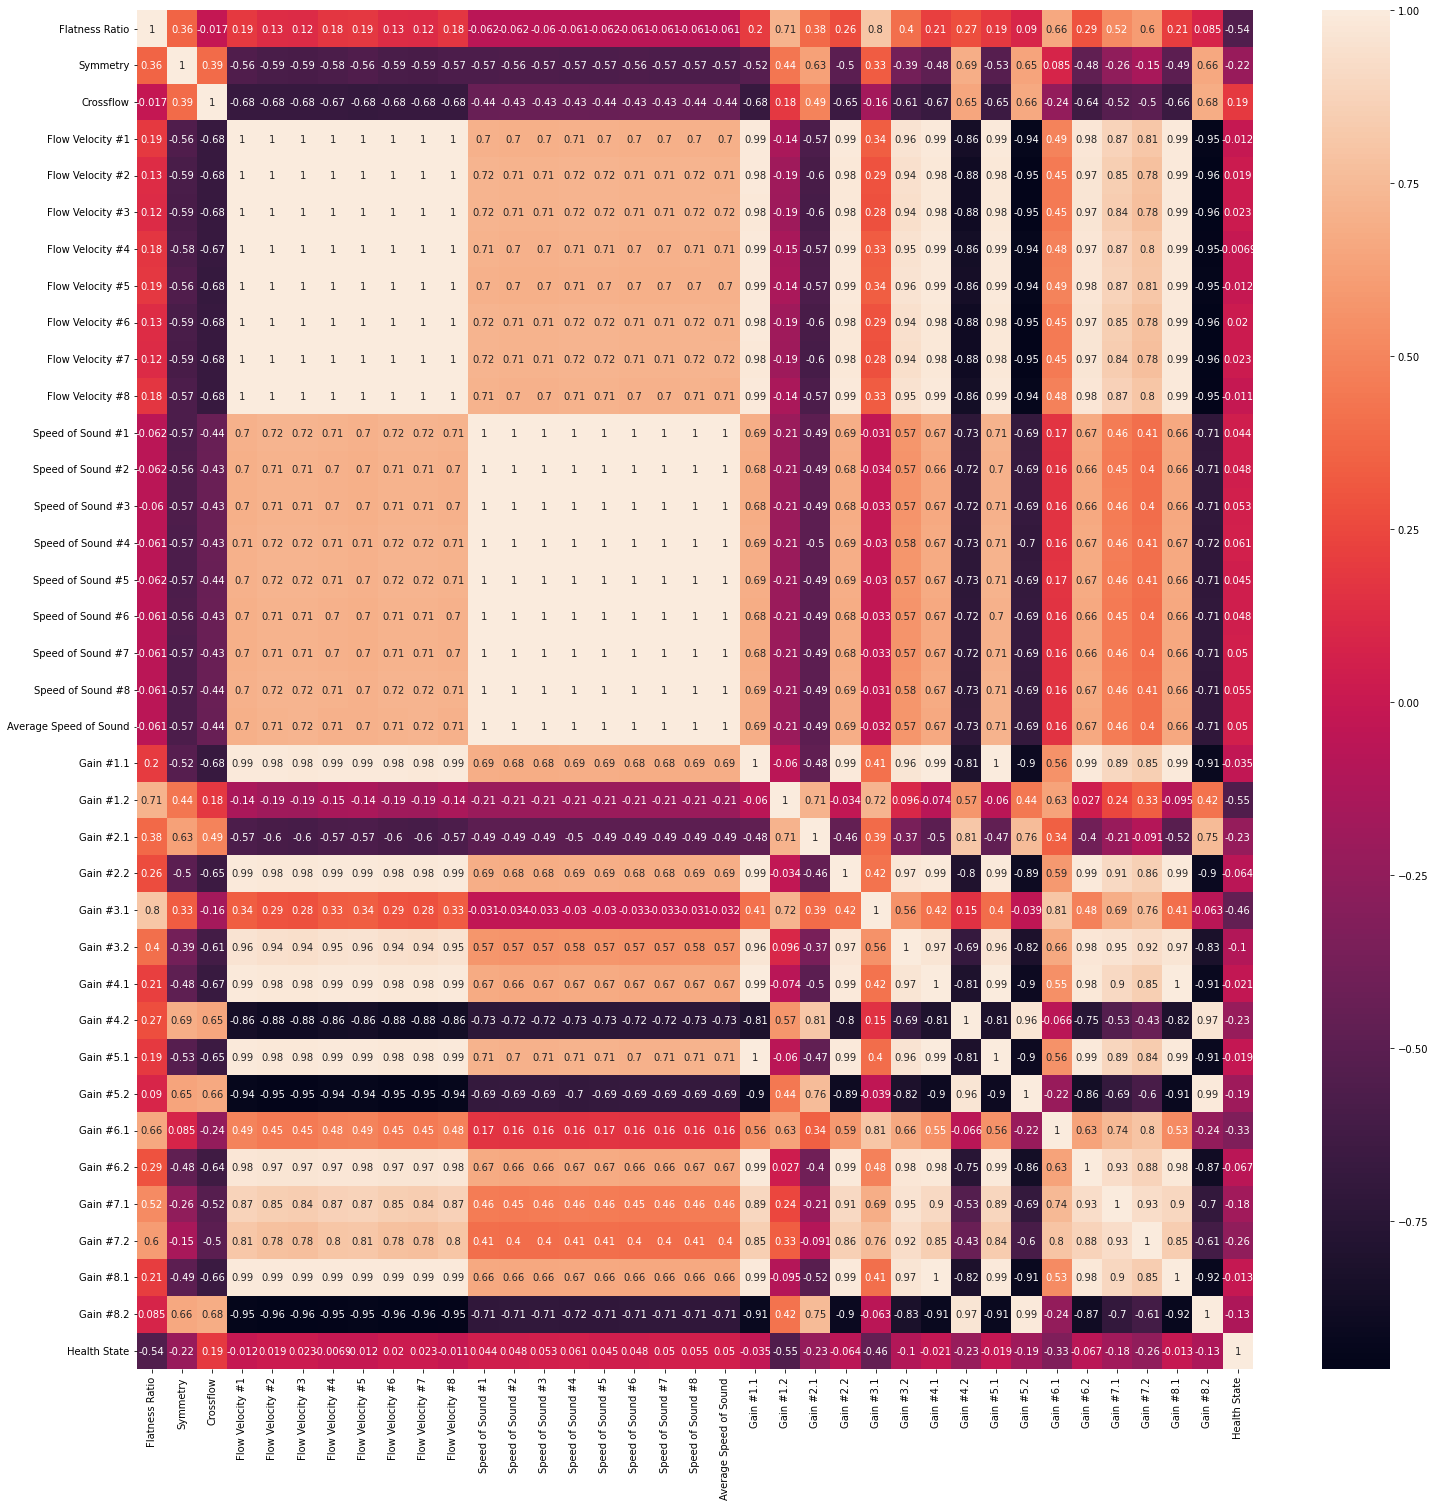

In [9]:
# Determine highly correlated columns in Meter A (Feature Importance)
plt.figure(figsize=(25, 25), facecolor='white')
sns.heatmap(meter_a.corr(), annot=True)
plt.plot()

meter_a_cols_corr = set()  # Set of all the names of correlated columns
for i in range(len(meter_a.corr().columns)-1):
    for j in range(i-1):
        if (meter_a.corr().iloc[i,j] > 0.9):
            colname = meter_a.corr().columns[i]
            meter_a_cols_corr.add(colname)
            print("\n {} and {} : \n {}".format(str(meter_a_cols[i]), str(meter_a_cols[j]), str(meter_a.corr().iloc[i,j])))


 Flow Velocity #3 and Flow Velocity #1 : 
 0.9515051268326545

 Average Flow Velocity and Flow Velocity #1 : 
 0.9487553744484433

 Average Flow Velocity and Flow Velocity #2 : 
 0.9554118427815481

 Average Flow Velocity and Flow Velocity #3 : 
 0.9951059137204139

 Signal Strength #1.2 and Symmetry : 
 0.905723672790505

 Signal Strength #2.1 and Signal Strength #1.1 : 
 0.9140330413787229

 Signal Strength #3.1 and Signal Strength #2.1 : 
 0.9269879907422475

 Signal Strength #3.2 and Signal Strength #2.1 : 
 0.9288145837078916

 Meter Performance and Signal Strength #2.1 : 
 0.9100109484982739

 Meter Performance and Signal Strength #3.1 : 
 0.9181232456585858

 Meter Performance and Signal Strength #3.2 : 
 0.917534187124456

 Signal Quality #4.1 and Speed of Sound #4 : 
 0.9478618296911883

 Signal Quality #4.2 and Speed of Sound #4 : 
 0.9646336151287529

 Gain #4.1 and Average Speed of Sound : 
 0.9350819224156831

 Gain #4.2 and Average Speed of Sound : 
 0.9350819224156831



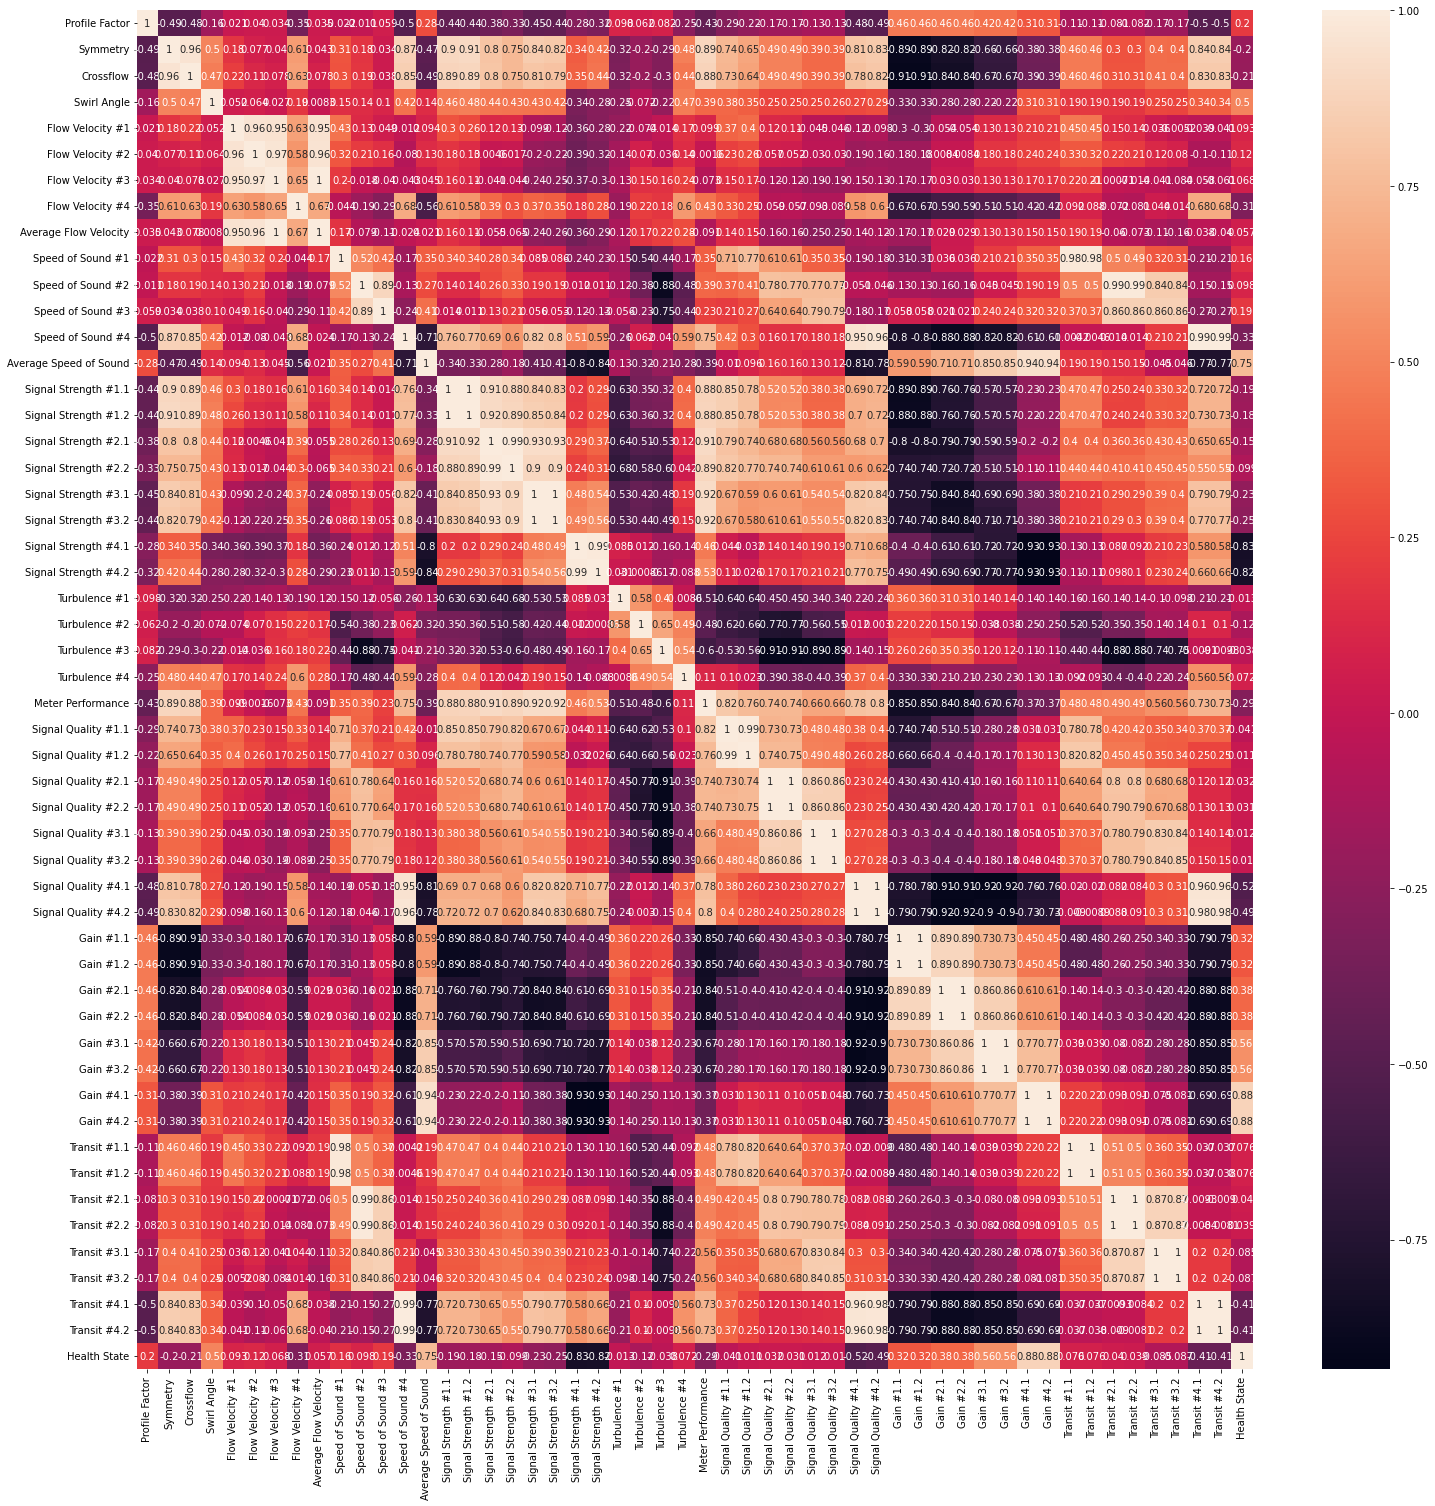

In [10]:
# Determine highly correlated columns in Meter B (Feature Importance)
plt.figure(figsize=(25, 25), facecolor='white')
sns.heatmap(meter_b.corr(), annot=True)
plt.plot()

meter_b_cols_corr = set()  # Set of all the names of correlated columns
for i in range(len(meter_b.corr().columns)-1):
    for j in range(i-1):
        if (meter_b.corr().iloc[i,j] > 0.9):
            colname = meter_b.corr().columns[i]
            meter_b_cols_corr.add(colname)
            print("\n {} and {} : \n {}".format(str(meter_b_cols[i]), str(meter_b_cols[j]), str(meter_b.corr().iloc[i,j])))


 Signal Quality #3.2 and Speed of Sound #3 : 
 0.922025727906361

 Transit #2.1 and Speed of Sound #2 : 
 0.9142390022984366

 Transit #2.2 and Speed of Sound #2 : 
 0.9249187213477349

 Transit #3.1 and Speed of Sound #3 : 
 0.9615777182380567

 Transit #3.2 and Speed of Sound #3 : 
 0.9591747192146012


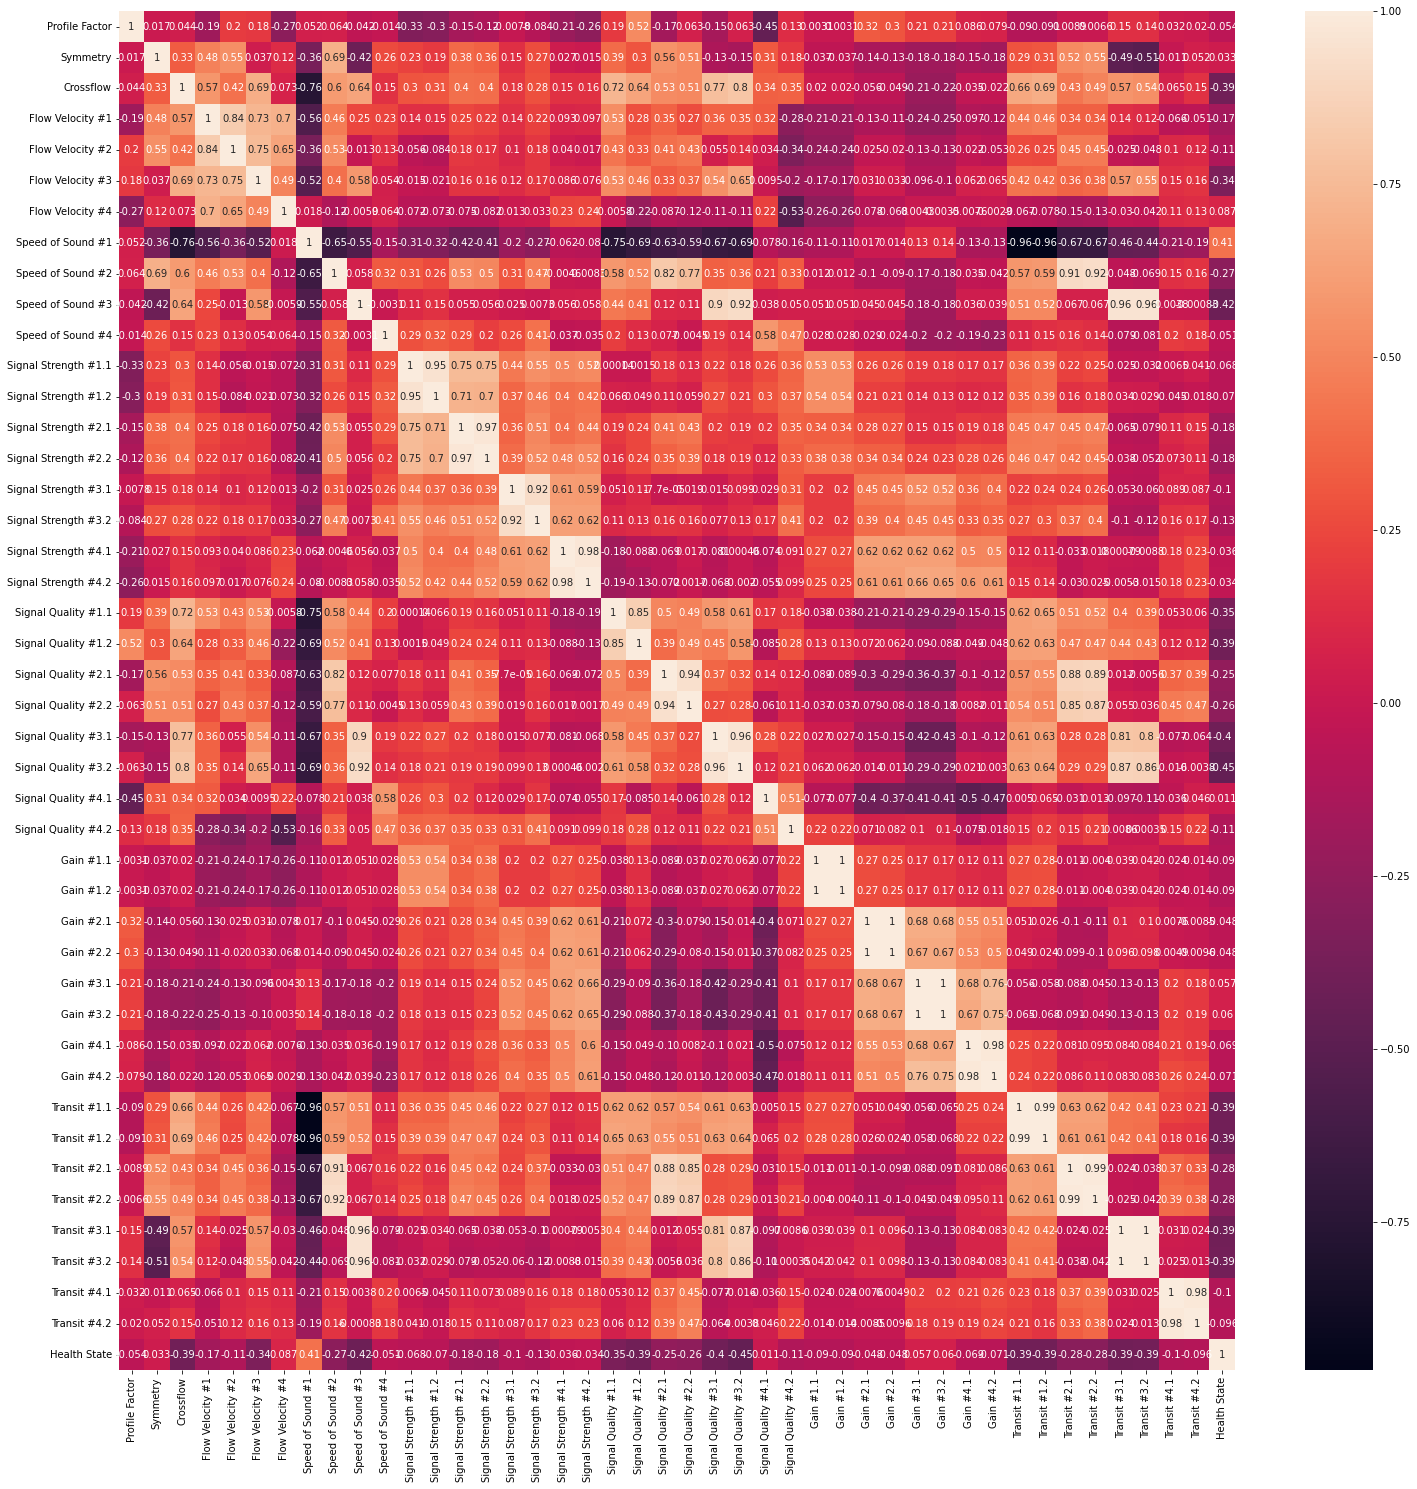

In [11]:
# Determine highly correlated columns in Meter C (Feature Importance)
plt.figure(figsize=(25, 25), facecolor='white')
sns.heatmap(meter_c.corr(), annot=True)
plt.plot()

meter_c_cols_corr = set()  # Set of all the names of correlated columns
for i in range(len(meter_c.corr().columns)-1):
    for j in range(i-1):
        if (meter_c.corr().iloc[i,j] > 0.9):
            colname = meter_c.corr().columns[i]
            meter_c_cols_corr.add(colname)
            print("\n {} and {} : \n {}".format(str(meter_c_cols[i]), str(meter_c_cols[j]), str(meter_c.corr().iloc[i,j])))

In [12]:
# Drop highly correlated features of Meter A
print(meter_a_cols_corr)
print(len(meter_a_cols_corr))
meter_a_corr = meter_a.drop(list(meter_a_cols_corr), inplace=False, axis=1)

meter_a_corr

{'Gain #7.1', 'Flow Velocity #4', 'Gain #2.2', 'Gain #5.2', 'Speed of Sound #3', 'Speed of Sound #5', 'Gain #8.1', 'Flow Velocity #8', 'Flow Velocity #6', 'Gain #8.2', 'Gain #7.2', 'Gain #3.2', 'Flow Velocity #3', 'Speed of Sound #7', 'Flow Velocity #5', 'Speed of Sound #8', 'Speed of Sound #4', 'Average Speed of Sound', 'Gain #4.1', 'Gain #1.1', 'Gain #5.1', 'Speed of Sound #6', 'Gain #6.2', 'Flow Velocity #7'}
24


Flatness Ratio  Symmetry  Crossflow  Flow Velocity #1  Flow Velocity #2  \
0         0.841499  1.009367   0.993816          8.469805         10.278727   
1         0.842250  1.006584   0.996605          7.531891          9.139924   
2         0.840723  1.011647   0.998152          6.641699          7.975464   
3         0.841119  1.017807   0.996812          5.687524          6.824334   
4         0.840358  1.016534   0.996221          5.660385          6.829560   
..             ...       ...        ...               ...               ...   
82        0.792929  1.006295   0.999666          2.696691          3.414048   
83        0.792309  1.004472   0.999873          2.679006          3.433638   
84        0.793471  1.009560   1.001110          2.691553          3.431745   
85        0.796730  1.010570   0.999029          2.714849          3.412818   
86        0.790194  1.004195   0.995537          1.781262          2.247824   

    Speed of Sound #1  Speed of Sound #2  Gain #1.2  Gain #2.1  Gain #3.1  \
0         1485.528500        1485.454000  33.505860  36.702475  35.323895   
1         1486.042333        1485.992833  33.429360  36.682942  35.294598   
2         1486.023667        1485.980833  33.419598  36.671552  35.275065   
3         1484.898000        1484.872000  33.403320  36.682942  35.276693   
4         1484.361333        1484.331833  33.382162  36.691080  35.275065   
..                ...                ...        ...        ...        ...   
82        1484.752667        1484.728333  33.370770  36.692708  35.201823   
83        1484.689000        1484.664500  33.375653  36.689453  35.188802   
84        1484.638167        1484.612667  33.378907  36.695963  35.200197   
85        1484.580167        1484.555833  33.377278  36.689453  35.200197   
86        1484.490833        1484.471167  33.409830  36.710610  35.201822   

    Gain #4.2  Gain #6.1  Health State  
0   32.451173  36.722005             1  
1   32.428385  36.687825             1  
2   32.428385  36.661785             1  
3   32.485350  36.673177             1  
4   32.503255  36.673177             1  
..        ...        ...           ...  
82  32.555338  36.640627             2  
83  32.545573  36.634115             2  
84  32.561848  36.635745             2  
85  32.555338  36.640627             2  
86  32.623697  36.650392             2  

[87 rows x 13 columns]

In [13]:
# Drop highly correlated features of Meter B
print(meter_b_cols_corr)
print(len(meter_b_cols_corr))
meter_b_corr = meter_b.drop(list(meter_b_cols_corr), inplace=False, axis=1)

meter_b_corr

{'Signal Strength #2.1', 'Gain #4.2', 'Signal Strength #1.2', 'Transit #2.1', 'Transit #1.2', 'Average Flow Velocity', 'Signal Strength #3.2', 'Signal Quality #4.2', 'Transit #2.2', 'Transit #4.2', 'Signal Quality #4.1', 'Signal Strength #3.1', 'Transit #1.1', 'Transit #4.1', 'Meter Performance', 'Gain #4.1', 'Flow Velocity #3'}
17


Profile Factor  Symmetry  Crossflow  Swirl Angle  Flow Velocity #1  \
0         1.185089  1.028128   1.016478       0.1500          2.195744   
1         1.191806  1.033750   1.019411       0.2170          2.192467   
2         1.181983  1.028089   1.020994       0.0889          3.246672   
3         1.182761  1.028783   1.021072       0.1170          3.244489   
4         1.182272  1.028922   1.021350       0.0222          3.245944   
..             ...       ...        ...          ...               ...   
87        2.418111  0.000000   0.000000       0.0000          5.332300   
88        3.290425  0.000000   0.000000       0.0000          5.420572   
89        2.601044  0.000000   0.000000       0.0000          5.256956   
90        2.336800  0.000000   0.000000       0.0000          5.222706   
91       -0.909168  0.000000   0.000000       0.0000          4.341200   

    Flow Velocity #2  Flow Velocity #4  Speed of Sound #1  Speed of Sound #2  \
0           2.540944          2.087889        1483.869833        1486.382167   
1           2.546594          2.075706        1483.747389        1486.259222   
2           3.738378          3.079356        1483.777056        1486.288222   
3           3.741861          3.080400        1483.847444        1486.357167   
4           3.742217          3.080950        1483.819056        1486.328444   
..               ...               ...                ...                ...   
87          6.662456          0.000000        1550.598167        1514.837722   
88          6.653589          0.000000        1542.063444        1514.835889   
89          6.672083          0.000000        1550.688444        1514.864944   
90          6.669056          0.000000        1550.800889        1514.913278   
91          7.222394          0.000000        1542.708278        1515.027222   

    Speed of Sound #3  Speed of Sound #4  Average Speed of Sound  \
0         1485.372056        1484.989000             1485.153222   
1         1485.250333        1484.867056             1485.030722   
2         1485.281000        1484.898889             1485.061111   
3         1485.350444        1484.970167             1485.131278   
4         1485.320500        1484.944333             1485.103278   
..                ...                ...                     ...   
87        1516.918111           0.000000             1527.452111   
88        1516.951389           0.000000             1527.424278   
89        1516.983444           0.000000             1527.512111   
90        1517.048222           0.000000             1527.587444   
91        1517.163722           0.000000             1527.773500   

    Signal Strength #1.1  Signal Strength #2.2  Signal Strength #4.1  \
0            5260.655556           4984.077778           4111.527778   
1            5256.227778           4981.433333           4107.144444   
2            5278.550000           4958.055556           4039.272222   
3            5276.144444           4956.305556           4036.355556   
4            5272.716667           4952.244444           4035.338889   
..                   ...                   ...                   ...   
87            126.551166           2372.372333              0.000000   
88            123.475461           2354.717556              0.000000   
89            128.643101           2468.318556              0.000000   
90            130.656267           2498.801944              0.000000   
91            125.600808           2305.357389              0.000000   

    Signal Strength #4.2  Turbulence #1  Turbulence #2  Turbulence #3  \
0            4291.850000       9.038944       4.426833       4.504556   
1            4286.327778       9.030167       4.284000       4.597500   
2            4302.883333       9.780722       4.612000       4.544778   
3            4297.377778       9.749389       4.835333       4.749278   
4            4297.572222       9.602333       4.479889       4.716833   
..                   ...          

In [14]:
# Drop highly correlated features of Meter C
print(meter_c_cols_corr)
print(len(meter_c_cols_corr))
meter_c_corr = meter_c.drop(list(meter_c_cols_corr), inplace=False, axis=1)

meter_c_corr

{'Transit #2.2', 'Transit #3.1', 'Transit #3.2', 'Signal Quality #3.2', 'Transit #2.1'}
5


Profile Factor  Symmetry  Crossflow  Flow Velocity #1  Flow Velocity #2  \
0          1.102690  1.004425   1.006741         15.228611         16.676389   
1          1.101432  1.003722   1.008256         14.106667         15.407500   
2          1.098568  1.002528   1.009103         14.136667         15.388056   
3          1.099516  1.007024   1.009363         14.146389         15.405000   
4          1.100336  1.000661   1.006709         14.056944         15.363611   
..              ...       ...        ...               ...               ...   
176        0.000000  0.000000   0.000000          0.000000          0.000000   
177        0.000000  0.000000   0.000000          0.000000          0.000000   
178        0.000000  0.000000   0.000000          0.000000          0.000000   
179        0.000000  0.000000   0.000000          0.000000          0.000000   
180        0.000000  0.000000   0.000000          0.000000          0.000000   

     Flow Velocity #3  Flow Velocity #4  Speed of Sound #1  Speed of Sound #2  \
0           16.713056         15.051389        1485.447222        1485.416667   
1           15.473889         13.930833        1485.222222        1485.211111   
2           15.484444         13.965833        1485.061111        1485.047222   
3           15.439167         13.906111        1485.144444        1485.113889   
4           15.452222         13.948889        1485.202778        1485.180556   
..                ...               ...                ...                ...   
176          0.000000         14.426944        2675.100000           0.000000   
177          0.000000         14.500278        2675.100000           0.000000   
178          0.000000         14.382778        2675.100000           0.000000   
179          0.000000         15.790556        2675.100000           0.000000   
180          0.000000         16.768056        2675.100000           0.000000   

     Speed of Sound #3  Speed of Sound #4  Signal Strength #1.1  \
0          1485.491667        1485.550000             62.000000   
1          1485.288889        1485.352778             62.000000   
2          1485.133333        1485.183333             62.000000   
3          1485.216667        1485.250000             62.000000   
4          1485.272222        1485.300000             62.000000   
..                 ...                ...                   ...   
176        1353.600000        1484.400000             58.277778   
177        1353.600000        1484.444444             60.166667   
178        1353.600000        1484.494444             59.388889   
179        1353.600000        1484.672222             59.305556   
180        1353.600000        1508.325000             61.472222   

     Signal Strength #1.2  Signal Strength #2.1  Signal Strength #2.2  \
0               62.000000             63.000000             63.000000   
1               62.000000             63.000000             63.000000   
2               62.000000             63.000000             63.000000   
3               62.000000             63.000000             63.000000   
4               62.000000             63.000000             63.000000   
..                    ...                   ...                   ...   
176             60.111111             63.166667             64.138889   
177             61.055556             54.527778             54.472222   
178             60.333333             59.444444             58.500000   
179             58.416667             57.250000             58.083333   
180             61.527778             59.611111             59.694444   

     Signal Strength #3.1  Signal Strength #3.2  Signal Strength #4.1  \
0               61.000000             61.000000             61.000000   
1               61.000000             61.000000             61.000000   
2               61.000000             61.000000             61.000000   
3               61.000000             61.000000             61.000000   
4               61.00000

# Individual METER B Testing

## Splitting the train test set of meter B

In [110]:
col = len(meter_b.columns)-1
x_b = meter_b.drop(labels=["Health State"], axis=1).values
y_b = meter_b["Health State"].astype(int).values
y_b = y_b.reshape(-1) # convert to 1d
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(x_b, y_b, test_size=0.3, random_state=42) 
X_train_b = pd.DataFrame(data = X_train_b, columns = meter_b.columns[:-1])
X_test_b = pd.DataFrame(data = X_test_b, columns = meter_b.columns[:-1])
y_train_b = pd.DataFrame(data = y_train_b, columns = ["Health State"])
y_test_b = pd.DataFrame(data = y_train_b, columns = ["Health State"])

X_train_b

Profile Factor  Symmetry  Crossflow  Swirl Angle  Flow Velocity #1  \
0         1.320422  0.714206   0.717556     0.070000          7.454328   
1         1.174856  0.000000   0.000000     0.000000          3.107061   
2         1.176644  1.025333   1.021261     0.038900          4.923694   
3         1.220939  1.150772   1.042367     0.794000          5.941556   
4         1.177961  1.030906   1.019450     0.016700          3.255339   
..             ...       ...        ...          ...               ...   
59        1.246800  0.960172   0.958061     0.760000          2.297956   
60        1.283417  1.094033   1.087272     1.833000          4.897144   
61        1.223150  1.148861   1.045761     0.900000          5.943828   
62        1.175839  1.029306   1.023956     0.088889          5.945617   
63        1.296167  1.096772   1.089178     1.956000          3.163772   

    Flow Velocity #2  Flow Velocity #3  Flow Velocity #4  \
0           8.401900          7.637556          5.707883   
1           3.512628          3.317233          0.000000   
2           5.653317          5.632161          4.681089   
3           6.877100          6.287128          4.864694   
4           3.745594          3.707656          3.090322   
..               ...               ...               ...   
59          2.852300          2.836472          2.358294   
60          5.728217          5.699006          4.022900   
61          6.877994          6.316817          4.858650   
62          6.810222          6.779139          5.619167   
63          3.717839          3.697022          2.589744   

    Average Flow Velocity  Speed of Sound #1  Speed of Sound #2  \
0                8.098683        1474.580167        1456.885500   
1                3.259622        1438.669000        1514.623889   
2                5.341794        1483.820611        1486.325611   
3                6.183078        1483.903167        1486.410500   
4                3.526094        1483.780056        1486.289667   
..                    ...                ...                ...   
59               2.685889        1406.897056        1488.044444   
60               5.298967        1483.385111        1485.863556   
61               6.193783        1484.061111        1486.571667   
62               6.445606        1484.280778        1486.788611   
63               3.432428        1483.380333        1485.860611   

    Speed of Sound #3  Speed of Sound #4  Average Speed of Sound  \
0         1316.459167        1190.744444             1480.928222   
1         1517.042389           0.000000             1526.604333   
2         1485.316556        1484.943278             1485.101222   
3         1502.121889        1550.200833             1505.658889   
4         1485.282333        1484.903667             1485.063889   
..                ...                ...                     ...   
59        1486.726944        1486.264333             1483.505389   
60        1484.731778        1550.776389             1501.189333   
61        1502.187500        1550.165667             1505.746167   
62        1485.778389        1485.406778             1485.563389   
63        1484.730722        1550.802833             1501.193611   

    Signal Strength #1.1  Signal Strength #1.2  Signal Strength #2.1  \
0            2731.055556           2445.605556           2548.033333   
1             179.326427            205.489233           1754.218611   
2            5320.066667           4891.733333           4996.033333   
3            5397.900000           4943.555556           4918.038889   
4            5270.022222           4994.744444           4968.261111   
..                   ...                   ...                   ...   
59           2030.655556           2007.422222           3301.138889   
60           5401.000000           5040.655556           5304.200000   
61           5397.022222           4948.594444           4925.238889   
62           5341.494444           4837.561111      

## Dropping correlation

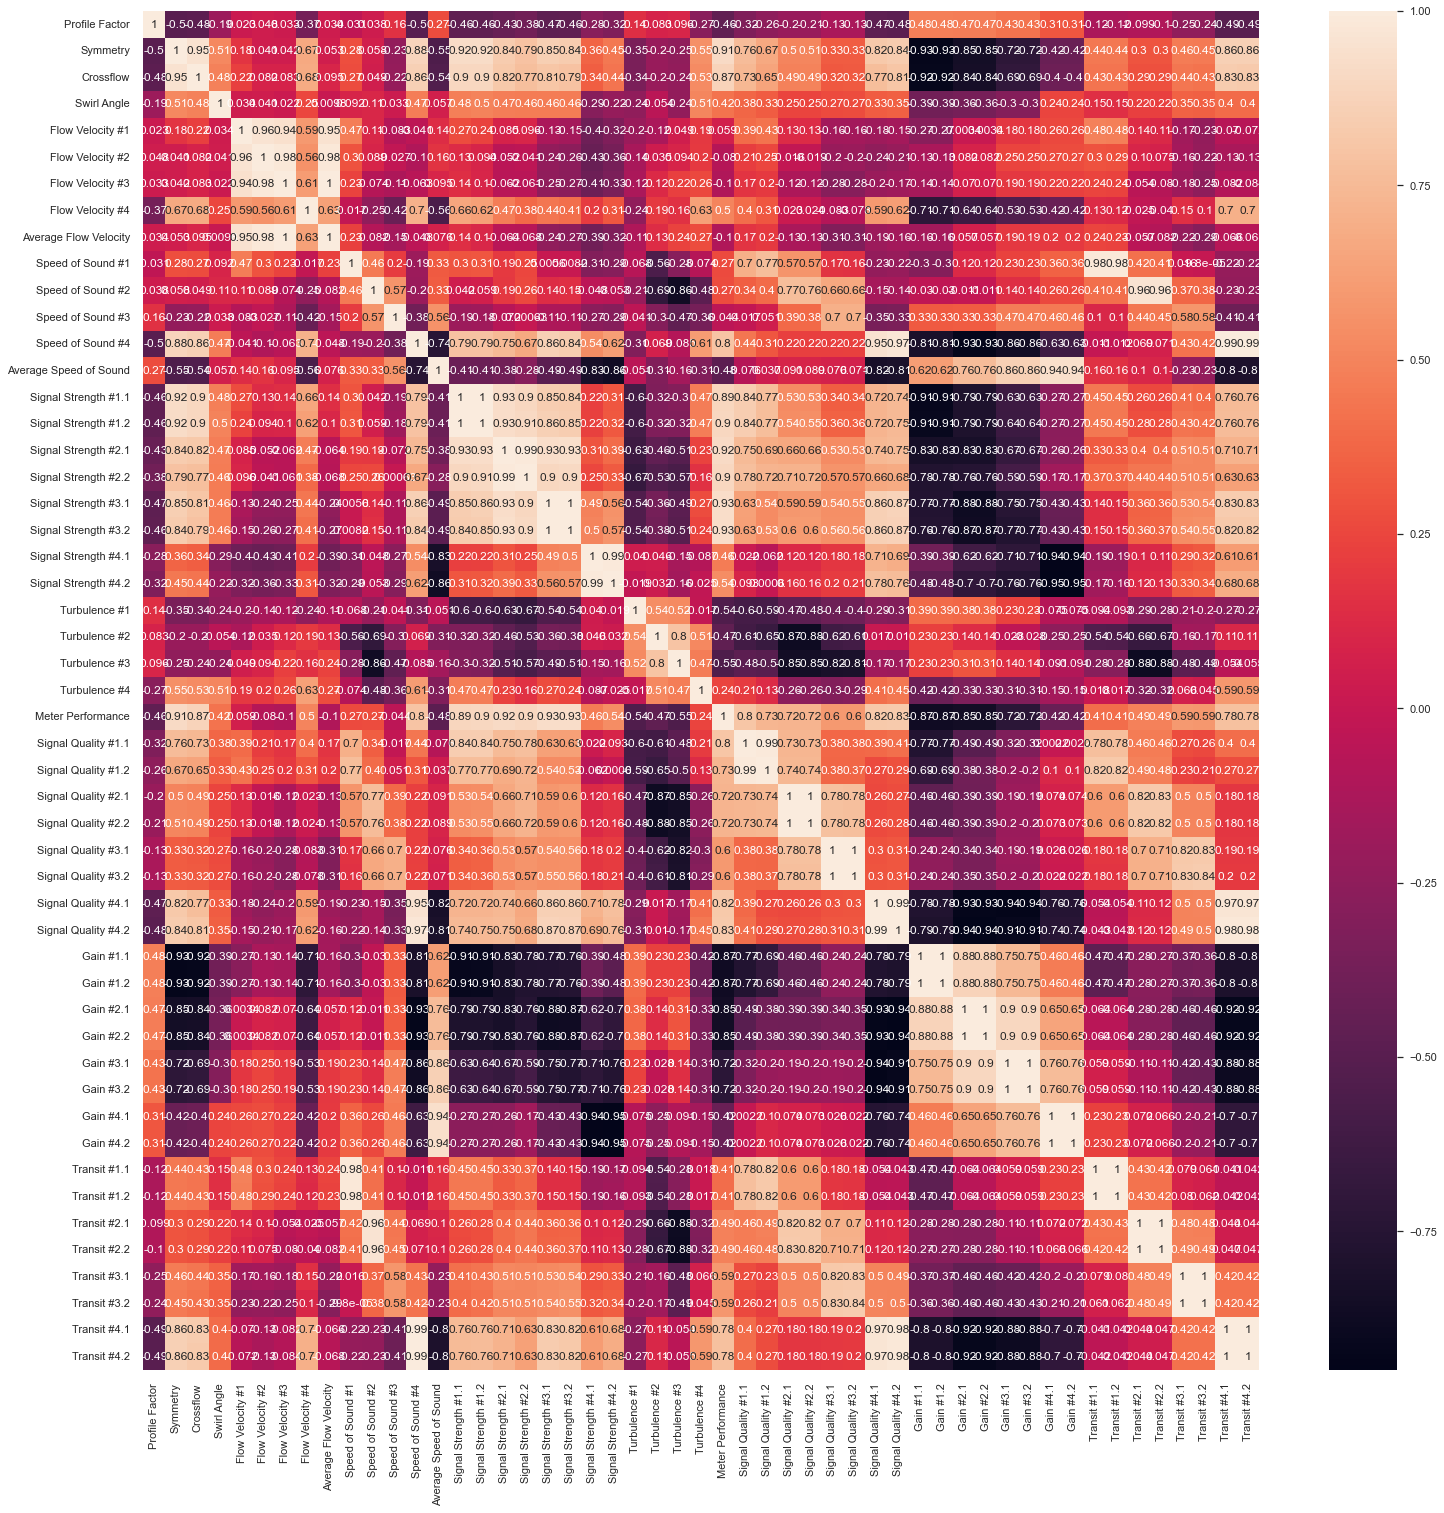

In [122]:
plt.figure(figsize=(25, 25), facecolor='white')
sns.heatmap(X_train_b.corr(), annot=True)
plt.plot()

meter_b_cols_corr = set()  # Set of all the names of correlated columns
for i in range(len(X_train_b.corr().columns)-1):
    for j in range(i-1):
        if (X_train_b.corr().iloc[i,j] > 0.9):
            colname = X_train_b.columns[i]
            meter_b_cols_corr.add(colname)
#             print(X_train_b.values[i])
#             print(X_train_b[j])
#            print("\n {} and {} : \n {}".format(str(X_train_b[i]), str(X_train_b[j]), str(X_train_b.corr.iloc[i,j])))

In [117]:
print(meter_b_cols_corr)

{'Signal Strength #2.1', 'Gain #4.2', 'Signal Strength #1.2', 'Transit #2.1', 'Transit #1.2', 'Average Flow Velocity', 'Signal Strength #3.2', 'Signal Quality #4.2', 'Transit #2.2', 'Signal Quality #4.1', 'Signal Strength #3.1', 'Transit #1.1', 'Transit #4.1', 'Meter Performance', 'Gain #4.1', 'Signal Strength #1.1', 'Flow Velocity #3', 'Signal Strength #2.2'}


In [125]:
X_train_b = meter_b.drop(labels=['Signal Strength #2.1', 'Gain #4.2', 'Signal Strength #1.2', 'Transit #2.1', 'Transit #1.2', 'Average Flow Velocity', 'Signal Strength #3.2', 'Signal Quality #4.2', 'Transit #2.2', 'Signal Quality #4.1', 'Signal Strength #3.1', 'Transit #1.1', 'Transit #4.1', 'Meter Performance', 'Gain #4.1', 'Signal Strength #1.1', 'Flow Velocity #3', 'Signal Strength #2.2'], axis=1)
X_test_b = meter_b.drop(labels=['Signal Strength #2.1', 'Gain #4.2', 'Signal Strength #1.2', 'Transit #2.1', 'Transit #1.2', 'Average Flow Velocity', 'Signal Strength #3.2', 'Signal Quality #4.2', 'Transit #2.2', 'Signal Quality #4.1', 'Signal Strength #3.1', 'Transit #1.1', 'Transit #4.1', 'Meter Performance', 'Gain #4.1', 'Signal Strength #1.1', 'Flow Velocity #3', 'Signal Strength #2.2'], axis=1)

## Discretization

In [15]:
# from sklearn.preprocessing import KBinsDiscretizer
# meterA_classification = meter_a_corr
# est = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans')
# est.fit(meterA_classification)
# meter_a_corr = pd.DataFrame(est.transform(meterA_classification), columns = meter_a_corr.columns)

# meterB_classification = meter_b_corr
# est = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans')
# est.fit(meterB_classification)
# meter_b_corr = pd.DataFrame(est.transform(meterB_classification), columns = meter_b_corr.columns)

# meterC_classification = meter_c_corr
# est = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans')
# est.fit(meterC_classification)
# meter_c_corr = pd.DataFrame(est.transform(meterC_classification), columns = meter_c_corr.columns)

# display(meter_a_corr)
# display(meter_b_corr)
# display(meter_c_corr)

## CORRELATION BETWEEN METERS

In [16]:
# Correlation between Meter A and B
ab_cols = meter_a_corr.columns.intersection(meter_b_corr.columns)
meter_a_ac = meter_a_corr[ab_cols]
meter_b_ac = meter_c_corr[ab_cols]

print(ab_cols)

meter_a_ac.corrwith(meter_b_ac, axis = 0)

Index(['Symmetry', 'Crossflow', 'Flow Velocity #1', 'Flow Velocity #2',
       'Speed of Sound #1', 'Speed of Sound #2', 'Gain #1.2', 'Gain #2.1',
       'Gain #3.1', 'Health State'],
      dtype='object')


Symmetry             0.202750
Crossflow           -0.109499
Flow Velocity #1     0.097469
Flow Velocity #2    -0.102039
Speed of Sound #1   -0.066598
Speed of Sound #2   -0.211685
Gain #1.2           -0.110855
Gain #2.1            0.213771
Gain #3.1            0.075331
Health State         0.585367
dtype: float64

In [17]:
# Correlation between Meter A and C
ac_cols = meter_a_corr.columns.intersection(meter_c_corr.columns)
meter_a_ac = meter_a_corr[ac_cols]
meter_c_ac = meter_c_corr[ac_cols]

print(ac_cols)

meter_a_ac.corrwith(meter_c_ac, axis = 0)

Index(['Symmetry', 'Crossflow', 'Flow Velocity #1', 'Flow Velocity #2',
       'Speed of Sound #1', 'Speed of Sound #2', 'Gain #1.2', 'Gain #2.1',
       'Gain #3.1', 'Gain #4.2', 'Health State'],
      dtype='object')


Symmetry             0.202750
Crossflow           -0.109499
Flow Velocity #1     0.097469
Flow Velocity #2    -0.102039
Speed of Sound #1   -0.066598
Speed of Sound #2   -0.211685
Gain #1.2           -0.110855
Gain #2.1            0.213771
Gain #3.1            0.075331
Gain #4.2            0.223226
Health State         0.585367
dtype: float64

In [18]:
# Correlation between Meter B and C
bc_cols = meter_b_corr.columns.intersection(meter_c_corr.columns)
meter_b_ac = meter_b_corr[bc_cols]
meter_c_ac = meter_c_corr[bc_cols]

print(bc_cols)

meter_b_ac.corrwith(meter_c_ac, axis = 0)

Index(['Profile Factor', 'Symmetry', 'Crossflow', 'Flow Velocity #1',
       'Flow Velocity #2', 'Flow Velocity #4', 'Speed of Sound #1',
       'Speed of Sound #2', 'Speed of Sound #3', 'Speed of Sound #4',
       'Signal Strength #1.1', 'Signal Strength #2.2', 'Signal Strength #4.1',
       'Signal Strength #4.2', 'Signal Quality #1.1', 'Signal Quality #1.2',
       'Signal Quality #2.1', 'Signal Quality #2.2', 'Signal Quality #3.1',
       'Gain #1.1', 'Gain #1.2', 'Gain #2.1', 'Gain #2.2', 'Gain #3.1',
       'Gain #3.2', 'Health State'],
      dtype='object')


Profile Factor         -0.019805
Symmetry               -0.187781
Crossflow              -0.093591
Flow Velocity #1       -0.156124
Flow Velocity #2       -0.207501
Flow Velocity #4       -0.201650
Speed of Sound #1      -0.064997
Speed of Sound #2      -0.029932
Speed of Sound #3      -0.052595
Speed of Sound #4      -0.074454
Signal Strength #1.1    0.112132
Signal Strength #2.2    0.191441
Signal Strength #4.1   -0.115914
Signal Strength #4.2   -0.092653
Signal Quality #1.1    -0.095609
Signal Quality #1.2     0.138922
Signal Quality #2.1    -0.088368
Signal Quality #2.2     0.005847
Signal Quality #3.1    -0.174311
Gain #1.1              -0.192862
Gain #1.2              -0.192862
Gain #2.1              -0.010704
Gain #2.2              -0.016425
Gain #3.1              -0.026389
Gain #3.2              -0.024046
Health State            0.646262
dtype: float64

## PRINCIPAL COMPONENT ANALYSIS

#### METER A

[4.91709353e-01 3.18607114e-01 6.31263041e-02 3.88791013e-02
 3.64226514e-02 2.88888011e-02 1.07326317e-02 6.64036132e-03
 3.74571547e-03 1.21830708e-03 2.63133728e-05 3.34635017e-06]


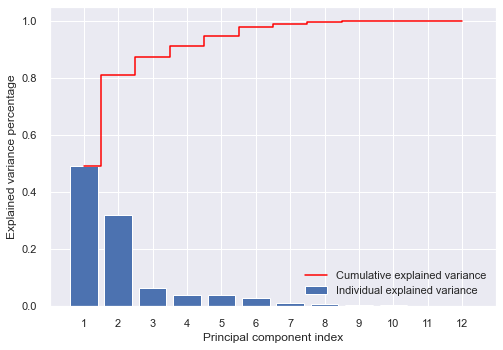

In [47]:
from sklearn.preprocessing import MinMaxScaler
# Finding the best number of principal components while keeping as much of the variance in the original data as possible
meter_a_pca = meter_a_corr.copy()
X_a= meter_a_pca.drop(['Health State'], axis=1)
Y_a= meter_a_pca[['Health State']]

# Normalized 
scaler = MinMaxScaler()
scaler.fit(X_a)
X_a = scaler.transform(X_a)

X_a_pca = PCA()
X_a_pca.fit(X_a)

eigen_energy = X_a_pca.explained_variance_ratio_
print(eigen_energy)

# Calculate cumulative sum of explained variances
var_exp = [(i / sum(X_a_pca.explained_variance_)) for i in sorted(X_a_pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Plot explained variances
plt.figure(facecolor='white') 
plt.bar(range(1, len(var_exp)+1), var_exp, align='center',
        label='Individual explained variance')

plt.step(range(1, len(cum_var_exp)+1), cum_var_exp, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(range(1, len(var_exp)+1))
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'cumulative explained variance')

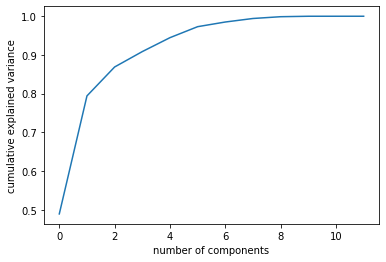

In [20]:
plt.figure(facecolor='white') 
plt.plot(np.cumsum(X_a_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [21]:
pca_a = PCA(n_components=0.8)
pca_a_components = pca_a.fit_transform(X_a)

total_var = pca_a.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(len(pca_a.explained_variance_ratio_))}

fig = px.scatter_matrix(
    pca_a_components,
    color=meter_a_corr["Health State"].astype(str),
    dimensions=range(len(pca_a.explained_variance_ratio_)),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
    width=800, 
    height=800,
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [22]:
pca_a.explained_variance_ratio_

array([0.48928516, 0.30490828, 0.07472117])

#### METER B

[4.15823689e-01 2.33107813e-01 1.25267165e-01 6.75014651e-02
 5.23063631e-02 3.04751033e-02 2.18397818e-02 1.47877716e-02
 1.12431378e-02 7.61854433e-03 6.33843911e-03 3.62556481e-03
 3.16805353e-03 1.45488176e-03 1.21064359e-03 1.06570096e-03
 8.98151716e-04 7.97517040e-04 5.38124414e-04 2.84459399e-04
 2.13357556e-04 1.59446630e-04 1.23362973e-04 7.34848504e-05
 4.80678658e-05 1.97208954e-05 7.35219564e-06 2.31974741e-06
 4.02286555e-07 1.09216463e-07 5.68800194e-09 2.86586681e-33
 2.86586681e-33 2.86586681e-33]


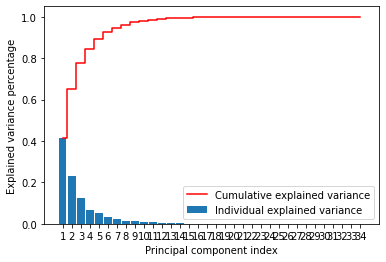

In [23]:
# Finding the best number of principal components while keeping as much of the variance in the original data as possible
meter_b_pca = meter_b_corr.copy()
X_b= meter_b_pca.drop(['Health State'], axis=1)
Y_b= meter_b_pca[['Health State']]

# Normalized 
scaler = StandardScaler()
scaler.fit(X_b)
X_b = scaler.transform(X_b)

X_b_pca = PCA()
X_b_pca.fit(X_b)


eigen_energy = X_b_pca.explained_variance_ratio_
print(eigen_energy)

# Calculate cumulative sum of explained variances
var_exp = [(i / sum(X_b_pca.explained_variance_)) for i in sorted(X_b_pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Plot explained variances
plt.figure(facecolor='white') 
plt.bar(range(1, len(var_exp)+1), var_exp, align='center',
        label='Individual explained variance')

plt.step(range(1, len(cum_var_exp)+1), cum_var_exp, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(range(1, len(var_exp)+1))
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'cumulative explained variance')

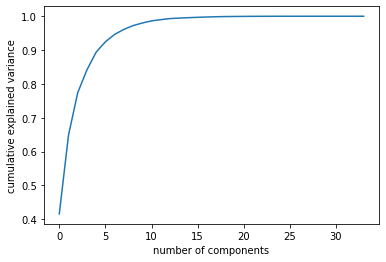

In [24]:
plt.figure(facecolor='white') 
plt.plot(np.cumsum(X_b_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [25]:
pca_b = PCA(n_components=0.8)
pca_b_components = pca_b.fit_transform(X_b)

total_var = pca_b.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(len(pca_b.explained_variance_ratio_))}

fig = px.scatter_matrix(
    pca_b_components,
    color=meter_b_corr["Health State"].astype(str),
    dimensions=range(len(pca_b.explained_variance_ratio_)),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
    width=800, 
    height=800,
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [26]:
pca_b.explained_variance_ratio_

array([0.41582369, 0.23310781, 0.12526717, 0.06750147])

#### METER C

[2.56641970e-01 2.04041368e-01 1.03221056e-01 8.51125420e-02
 7.37211449e-02 5.70582578e-02 5.14225094e-02 3.66461827e-02
 2.86334392e-02 2.18475675e-02 1.94435126e-02 1.71228458e-02
 1.19410275e-02 8.79633134e-03 8.31321408e-03 5.62587272e-03
 3.43158158e-03 1.62471166e-03 1.25530335e-03 1.07500383e-03
 8.48032446e-04 7.27369941e-04 3.80775085e-04 3.27456730e-04
 2.49067978e-04 1.58403908e-04 1.09067500e-04 6.86314610e-05
 5.75280910e-05 4.25895383e-05 2.47015512e-05 1.64537544e-05
 1.13439223e-05 1.78591550e-06 7.50624322e-07 3.83361106e-07
 2.15108916e-07 9.58438077e-34]


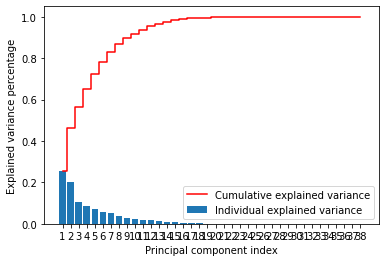

In [27]:
# Finding the best number of principal components while keeping as much of the variance in the original data as possible
meter_c_pca = meter_c_corr.copy()
X_c= meter_c_pca.drop(['Health State'], axis=1)
Y_c= meter_c_pca[['Health State']]

# Normalized 
scaler = StandardScaler()
scaler.fit(X_c)
X_c = scaler.transform(X_c)

X_c_pca = PCA()
X_c_pca.fit(X_c)

eigen_energy = X_c_pca.explained_variance_ratio_
print(eigen_energy)

# Calculate cumulative sum of explained variances
var_exp = [(i / sum(X_c_pca.explained_variance_)) for i in sorted(X_c_pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Plot explained variances
plt.figure(facecolor='white') 
plt.bar(range(1, len(var_exp)+1), var_exp, align='center',
        label='Individual explained variance')

plt.step(range(1, len(cum_var_exp)+1), cum_var_exp, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(range(1, len(var_exp)+1))
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'cumulative explained variance')

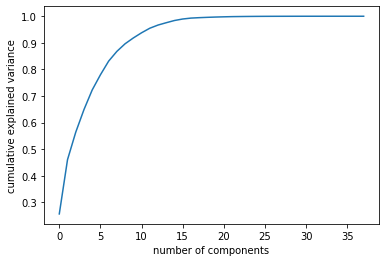

In [28]:
plt.figure(facecolor='white') 
plt.plot(np.cumsum(X_c_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [29]:
pca_c = PCA(n_components=0.8)
pca_c_components = pca_c.fit_transform(X_c)

total_var = pca_c.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(len(pca_c.explained_variance_ratio_))}

fig = px.scatter_matrix(
    pca_c_components,
    color=meter_c_corr["Health State"].astype(str),
    dimensions=range(len(pca_c.explained_variance_ratio_)),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
    width=800, 
    height=800,
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [30]:
pca_c.explained_variance_ratio_

array([0.25664197, 0.20404137, 0.10322106, 0.08511254, 0.07372114,
       0.05705826, 0.05142251])

## COMBINING THE METERS

In [31]:
# Appending multiple DataFrame

# ================================ Meter a ================================
meter_a_data = pd.DataFrame(data=pca_a_components, columns=[
                        'Principal Component A1', 'Principal Component A2', 'Principal Component A3'])
meter_a_data['Health State'] = meter_a_corr['Health State']

# Health state class 2 of meter a needs to change to class 3 to match with meter c
meter_a_data.loc[meter_a_data['Health State'] == 2, 'Health State'] = 3
display(meter_a_data)

# ================================ Meter b ================================
meter_b_data = pd.DataFrame(data=pca_b_components, columns=[
                        'Principal Component B1', 'Principal Component B2', 'Principal Component B3', 'Principal Component B4'])
meter_b_data['Health State'] = meter_b_pca['Health State']

# Health state class 3 of meter a needs to change to class 4 to match with meter c
meter_b_data.loc[meter_b_data['Health State'] == 3, 'Health State'] = 4
display(meter_b_data)

# ================================ Meter c ================================
meter_c_data = pd.DataFrame(data=pca_c_components, columns=[
                        'Principal Component C1', 'Principal Component C2', 'Principal Component C3', 'Principal Component C4',
                        'Principal Component C5', 'Principal Component C6', 'Principal Component C7'])
meter_c_data['Health State'] = meter_c_pca['Health State']
display(meter_c_data)

result = meter_a_data.append([meter_b_data, meter_c_data])
column_to_move = result.pop("Health State")

# Insert column as the last column using insert(location, column_name, column_value)
result.insert(len(result.columns), "Health State", column_to_move)

display(result)

Principal Component A1  Principal Component A2  Principal Component A3  \
0                 2.025417                5.270659               -0.589215   
1                 2.582778                2.683285                0.363611   
2                 1.973291                1.277294                0.672171   
3                 0.276782                1.294905               -0.944352   
4                -0.119246                1.025963               -1.755657   
..                     ...                     ...                     ...   
82               -0.907756               -3.137373                0.619599   
83               -0.840327               -3.545865                0.656645   
84               -1.470114               -3.201479                0.850135   
85               -1.143872               -2.951847                0.182466   
86               -1.567346               -2.433077                0.050491   

    Health State  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
82             3  
83             3  
84             3  
85             3  
86             3  

[87 rows x 4 columns]

Principal Component B1  Principal Component B2  Principal Component B3  \
0                -2.639360                0.421701                1.630254   
1                -2.649933                0.421818                1.614755   
2                -2.724207                0.509663                1.145279   
3                -2.718696                0.536557                1.117609   
4                -2.710561                0.508463                1.155430   
..                     ...                     ...                     ...   
87                5.881859               -4.264684               -0.768623   
88                6.082679               -4.238077               -0.772493   
89                5.806978               -4.336275               -0.757565   
90                5.758179               -4.349239               -0.712425   
91                5.659916               -3.891769               -0.463874   

    Principal Component B4  Health State  
0                -1.596904             1  
1                -1.597248             1  
2                -1.078679             1  
3                -1.055886             1  
4                -1.094377             1  
..                     ...           ...  
87                0.102661             4  
88                0.190271             4  
89                0.061717             4  
90                0.063591             4  
91                0.328065             4  

[92 rows x 5 columns]

Principal Component C1  Principal Component C2  Principal Component C3  \
0                 -0.942003               -1.299303                1.204549   
1                 -0.909270               -1.241635                0.907732   
2                 -0.921665               -1.254451                0.909743   
3                 -0.930358               -1.256835                0.892268   
4                 -0.894798               -1.232526                0.915655   
..                      ...                     ...                     ...   
176                9.628747                2.572871               -1.053492   
177               11.472679                2.013243                0.108175   
178                8.625909                4.403958               -0.823508   
179               10.679513                2.510318                0.234230   
180                8.797823                4.755498               -0.612514   

     Principal Component C4  Principal Component C5  Principal Component C6  \
0                 -1.072986                1.264579                0.085788   
1                 -0.808455                1.005980                0.028625   
2                 -0.816995                1.010494                0.016101   
3                 -0.818860                0.989996                0.023809   
4                 -0.805488                1.002286                0.015255   
..                      ...                     ...                     ...   
176                0.512361                2.097746               -1.800826   
177                0.977583                2.667646               -2.221062   
178               -0.882630                2.442129               -0.887269   
179                0.441991                2.404765               -1.795792   
180               -0.873086                3.366212               -1.921850   

     Principal Component C7  Health State  
0                  0.255202             1  
1                  0.102269             1  
2                  0.106811             1  
3                  0.091034             1  
4                  0.128629             1  
..                      ...           ...  
176               -0.368001             4  
177               -2.473804             4  
178               -4.213275             4  
179               -2.337574             4  
180               -1.686178             4  

[181 rows x 8 columns]

Principal Component A1  Principal Component A2  Principal Component A3  \
0                  2.025417                5.270659               -0.589215   
1                  2.582778                2.683285                0.363611   
2                  1.973291                1.277294                0.672171   
3                  0.276782                1.294905               -0.944352   
4                 -0.119246                1.025963               -1.755657   
..                      ...                     ...                     ...   
176                     NaN                     NaN                     NaN   
177                     NaN                     NaN                     NaN   
178                     NaN                     NaN                     NaN   
179                     NaN                     NaN                     NaN   
180                     NaN                     NaN                     NaN   

     Principal Component B1  Principal Component B2  Principal Component B3  \
0                       NaN                     NaN                     NaN   
1                       NaN                     NaN                     NaN   
2                       NaN                     NaN                     NaN   
3                       NaN                     NaN                     NaN   
4                       NaN                     NaN                     NaN   
..                      ...                     ...                     ...   
176                     NaN                     NaN                     NaN   
177                     NaN                     NaN                     NaN   
178                     NaN                     NaN                     NaN   
179                     NaN                     NaN                     NaN   
180                     NaN                     NaN                     NaN   

     Principal Component B4  Principal Component C1  Principal Component C2  \
0                       NaN                     NaN                     NaN   
1                       NaN                     NaN                     NaN   
2                       NaN                     NaN                     NaN   
3                       NaN                     NaN                     NaN   
4                       NaN                     NaN                     NaN   
..                      ...                     ...                     ...   
176                     NaN                9.628747                2.572871   
177                     NaN               11.472679                2.013243   
178                     NaN                8.625909                4.403958   
179                     NaN               10.679513                2.510318   
180                     NaN                8.797823                4.755498   

     Principal Component C3  Principal Component C4  Principal Component C5  \
0                       NaN                     NaN                     NaN   
1                       NaN                     NaN                     NaN   
2                       NaN                     NaN                     NaN   
3                       NaN                     NaN                     NaN   
4                       NaN                     NaN                     NaN   
..                      ...                     ...                     ...   
176               -1.053492                0.512361                2.097746   
177                0.108175                0.977583                2.667646   
178               -0.823508               -0.882630                2.442129   
179                0.234230                0.441991                2.404765   
180               -0.612514               -0.873086                3.366212   

     Principal Component C6  Principal Component C7  Health State  
0                       NaN                     NaN             1  
1                       NaN                     NaN             1  
2    

In [32]:
# Imputation
# Define Iterative Imputer and fill missing values
imputer = IterativeImputer(max_iter=1500, random_state=42)
df = pd.DataFrame(imputer.fit_transform(result), columns = result.columns)

df.isna().any()

Principal Component A1    False
Principal Component A2    False
Principal Component A3    False
Principal Component B1    False
Principal Component B2    False
Principal Component B3    False
Principal Component B4    False
Principal Component C1    False
Principal Component C2    False
Principal Component C3    False
Principal Component C4    False
Principal Component C5    False
Principal Component C6    False
Principal Component C7    False
Health State              False
dtype: bool

In [33]:
##########################################################
# Splitting dataset
##########################################################
col = len(df.columns)
x = df.iloc[:,0:col-1].values # assumes your labels are always in the final column.
y = df.iloc[:,col-1:col].astype(int).values
y = y.reshape(-1) # convert to 1d

##########################################################
# Create the Training and Test set with split 70:30
##########################################################
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [34]:
##########################################################
# Perform naive bayes
##########################################################
# Create a Gaussian Classifier
clf1=GaussianNB()

# Train the model using the training sets
clf1.fit(X_train, Y_train) 

# Predict the response for dataset
Y_predTrain = clf1.predict(X_train)
Y_predTest = clf1.predict(X_test)

# Check the accuracy using actual and predicted values.
trainAcc=accuracy_score(Y_train, Y_predTrain)
testAcc=accuracy_score(Y_test, Y_predTest)
print("\nTraining Accuracy:", trainAcc)
print("\nTesting Accuracy:", testAcc)


Training Accuracy: 0.6825396825396826

Testing Accuracy: 0.6203703703703703


              precision    recall  f1-score   support

           1       0.67      0.92      0.78        36
           2       0.80      0.33      0.47        12
           3       0.46      0.61      0.53        31
           4       0.85      0.38      0.52        29

    accuracy                           0.62       108
   macro avg       0.70      0.56      0.57       108
weighted avg       0.67      0.62      0.60       108



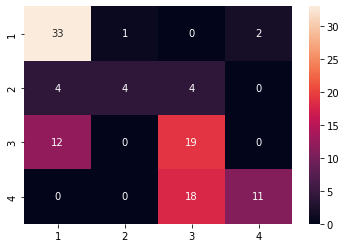

In [35]:
cm_labels = np.unique(df['Health State']).astype(int)
cm_array = confusion_matrix(Y_test, Y_predTest)
cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)

sns.heatmap(cm_array_df, annot=True)
print(classification_report(Y_test, Y_predTest))

Text(0, 0.5, 'Accuracy')

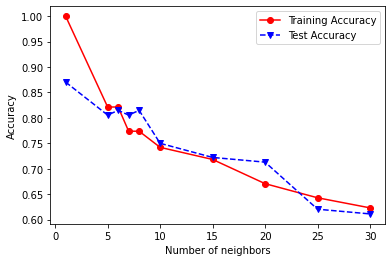

In [36]:
##########################################################
# Determine the k value for KNN
##########################################################
numNeighbors = [1, 5, 6, 7, 8, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    model.fit(X_train, Y_train)
    Y_predTrain = model.predict(X_train)
    Y_predTest = model.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.figure(facecolor='white') 
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

              precision    recall  f1-score   support

           1       0.74      0.94      0.83        36
           2       1.00      0.58      0.74        12
           3       0.78      0.81      0.79        31
           4       0.96      0.76      0.85        29

    accuracy                           0.81       108
   macro avg       0.87      0.77      0.80       108
weighted avg       0.84      0.81      0.81       108



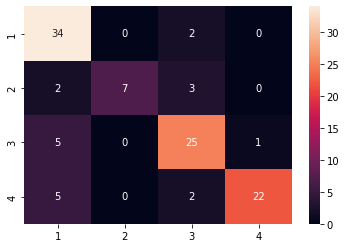

In [37]:
clf2 = KNeighborsClassifier(n_neighbors=6)
clf2.fit(X_train, Y_train)

Y_predTest = clf2.predict(X_test)

cm_labels = np.unique(df['Health State']).astype(int)
cm_array = confusion_matrix(Y_test, Y_predTest)
cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)

sns.heatmap(cm_array_df, annot=True)
print(classification_report(Y_test, Y_predTest))


Text(0, 0.5, 'Accuracy')

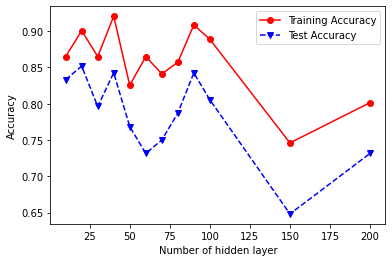

In [38]:
##########################################################
# Determine the hidden layer for NN
##########################################################
hidden_layer_sizes = [(10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50), (60,60,60), (70,70,70), (80,80,80) , (90,90,90), (100,100,100), (150,150,150), (200,200,200)]
trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    clf3 = MLPClassifier(solver='adam', hidden_layer_sizes=k, learning_rate='adaptive', random_state=1, max_iter=2000)
    clf3.fit(X_train, Y_train)
    Y_predTrain = clf3.predict(X_train)
    Y_predTest = clf3.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.figure(facecolor='white') 
hidden_layer_size=[x[0] for x in hidden_layer_sizes]
plt.plot(hidden_layer_size, trainAcc, 'ro-', hidden_layer_size, testAcc,'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')


              precision    recall  f1-score   support

           1       0.81      0.97      0.89        36
           2       0.54      0.58      0.56        12
           3       0.88      0.71      0.79        31
           4       0.85      0.79      0.82        29

    accuracy                           0.81       108
   macro avg       0.77      0.76      0.76       108
weighted avg       0.81      0.81      0.80       108



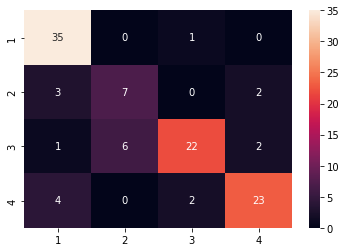

In [39]:
clf3 = MLPClassifier(solver='adam', hidden_layer_sizes=(100,100,100), learning_rate='adaptive', random_state=1, max_iter=1500)
clf3.fit(X_train, Y_train)

Y_predTest = clf3.predict(X_test)

cm_labels = np.unique(df['Health State']).astype(int)
cm_array = confusion_matrix(Y_test, Y_predTest)
cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)

sns.heatmap(cm_array_df, annot=True)
print(classification_report(Y_test, Y_predTest))

## ROC CURVE

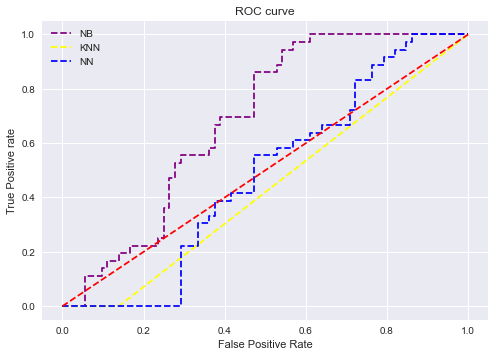

In [40]:
# predict probabilities
pred_prob1 = clf1.predict_proba(X_test)
pred_prob2 = clf2.predict_proba(X_test)
pred_prob3 = clf3.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='purple', label='NB')
plt.plot(fpr2, tpr2, linestyle='--',color='yellow', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='NN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

## DATA VISUALIZATION

In [41]:
##########################################################
# Create the Training and Test set of each meter's 1st & 2nd PC with split 70:30
##########################################################
col = len(meter_a_data.columns)
x_a = meter_a_data[['Principal Component A1', 'Principal Component A2']].values
y_a = meter_a_data[['Health State']].astype(int).values
y_a = y_a.reshape(-1) # convert to 1d
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(x_a, y_a, test_size=0.3, random_state=42) 

col = len(meter_b_data.columns)
x_b = meter_b_data[['Principal Component B1', 'Principal Component B2']].values
y_b = meter_b_data.iloc[:,col-1:col].astype(int).values
y_b = y_b.reshape(-1) # convert to 1d
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(x_b, y_b, test_size=0.3, random_state=42) 

col = len(meter_c_data.columns)
x_c = meter_c_data[['Principal Component C1', 'Principal Component C2']].values
y_c = meter_c_data.iloc[:,col-1:col].astype(int).values
y_c = y_c.reshape(-1) # convert to 1d
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(x_c, y_c, test_size=0.3, random_state=42) 

In [42]:
# Initializing Classifiers
dv_clf1 = GaussianNB()
dv_clf2 = KNeighborsClassifier(n_neighbors=7)
dv_clf3 = MLPClassifier(solver='adam', hidden_layer_sizes=(70,70,70), learning_rate='adaptive', random_state=1, max_iter=1500)

In [43]:
def plot_decision_boundaries(X_train, Y_train, X_test, Y_test, model, **model_params):
    my_cmap = sns.color_palette("mako", as_cmap=True)
    
    model.fit(X_train, Y_train)

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    # step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

    # meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    # obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.5)
    
    scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=my_cmap, alpha=1.0, edgecolor="black")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.xlabel("PC 1", fontsize=15)
    plt.ylabel("PC 2", fontsize=15)

    classes = ['Healthy', 'Gas Injection', 'Installation Effects', 'Waxing']
    plt.legend(handles=scatter.legend_elements()[0], labels=classes, loc='center left', bbox_to_anchor=(1, 0.5))

    return plt


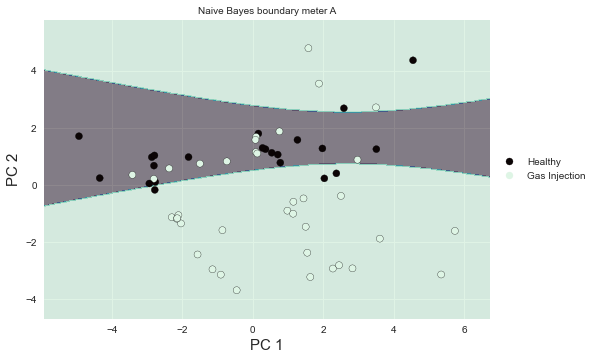

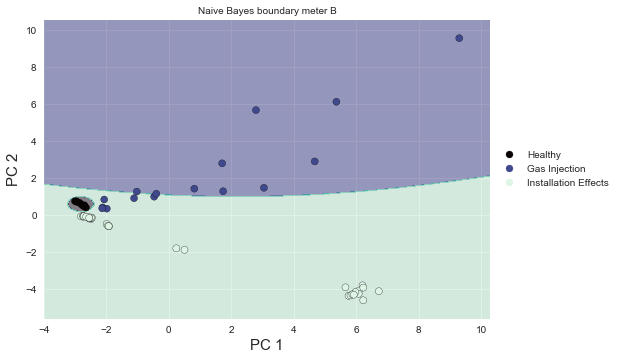

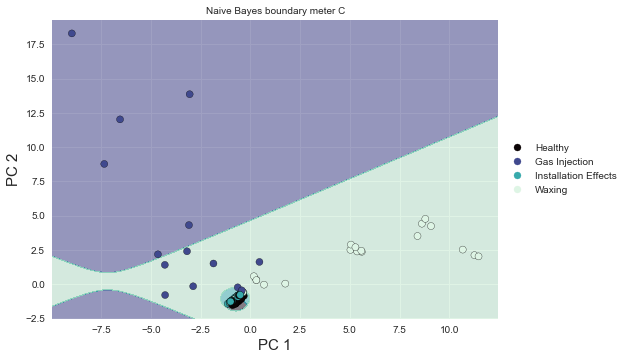

In [44]:
# Naive Bayes for Meter A
plt.figure()
plt.title("Naive Bayes boundary meter A", fontsize=10)
plot_decision_boundaries(X_train_a, Y_train_a,
                         X_test_a, Y_test_a, dv_clf1)
plt.show()

# Naive Bayes for Meter B
plt.figure()
plt.title("Naive Bayes boundary meter B", fontsize=10)
plot_decision_boundaries(X_train_b, Y_train_b,
                         X_test_b, Y_test_b, dv_clf1)
plt.show()

# Naive Bayes for Meter C
plt.figure()
plt.title("Naive Bayes boundary meter C", fontsize=10)
plot_decision_boundaries(X_train_c, Y_train_c,
                         X_test_c, Y_test_c, dv_clf1)
plt.show()

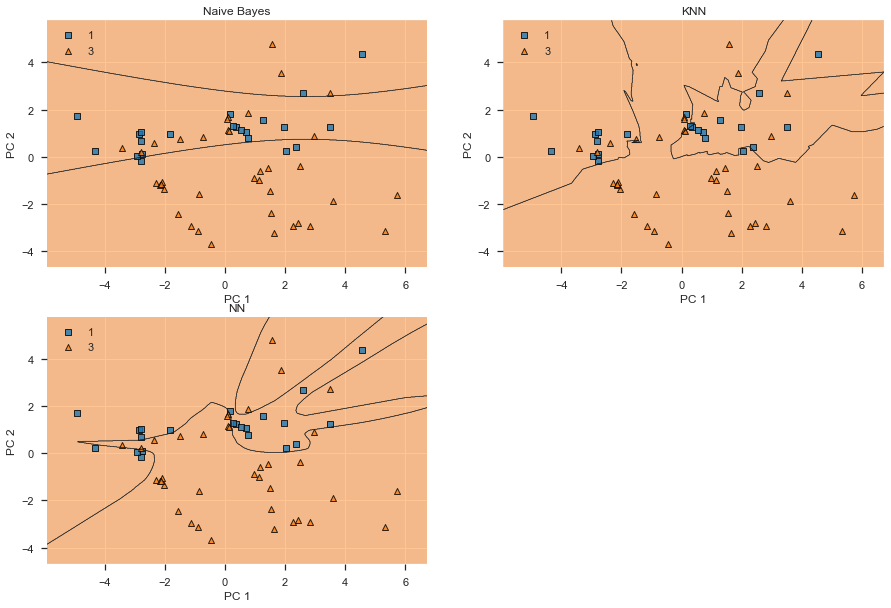

In [45]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(15,10))

labels = ['Naive Bayes', 'KNN', 'NN']
for clf, lab, grd in zip([dv_clf1, dv_clf2, dv_clf3],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train_a, Y_train_a)
    value=1.5
    width=0.75
    sns.set(rc={'figure.facecolor':'white'})
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_a, y=Y_train_a, clf=clf, legend=2, ax=ax)
    
    # Adding axes annotations
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title(lab)

#     classes = ['Healthy', 'Gas Injection', 'Installation Effects', 'Waxing']
#     handles, labels = ax.get_legend_handles_labels()
#     ax.legend(handles, 
#             classes, 
#             framealpha=0.3, scatterpoints=1)

plt.show()